In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

dataset = pd.read_csv(r"C:\Users\kelvin\Downloads\archive (30)\raw_sales.csv")
dataset['datesold'] = pd.to_datetime(dataset['datesold'],infer_datetime_format=True)
indexedDataset= dataset.set_index(['datesold'])
# df= pd.DataFrame(indexedDataset['price'],columns=['price'])
# df.index.name='date'
df=dataset
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2


In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
# df.reset_index(inplace=True)
# df

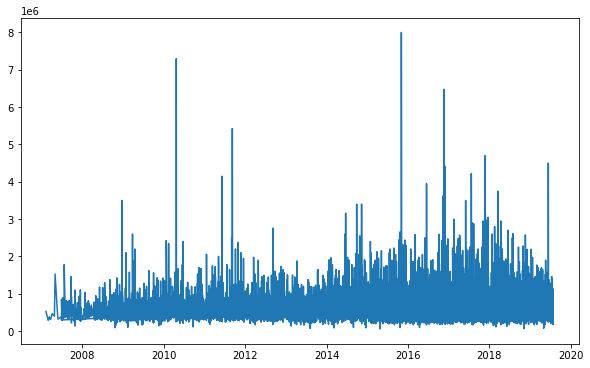

In [7]:
import matplotlib.pyplot as plt
plt.plot(df['datesold'],df['price'])

In [8]:
x=df['price'].values
result = adfuller(x)
print('ADF Statistic: %f'%result[0])
print('p-value: %f'%result[2])
print('Critical values:')
for key,value in result[4].items():
    print('\t%s:%.3f'%(key,value))
if result[0]<result[4]['5%']:
    print('Reject Ho-Time series is stationary')
else:
    print('Failed to reject-Time series is non-stationary')

ADF Statistic: -10.435027
p-value: 50.000000
Critical values:
	1%:-3.431
	5%:-2.862
	10%:-2.567
Reject Ho-Time series is stationary


In [9]:
df['Diffprice'] = df['price'].diff()
Diffprice = df['Diffprice'].values
y= Diffprice[~np.isnan(Diffprice)]

In [10]:
ts_values_orig = df['price'].values
ts_values = ts_values_orig[:-1]

In [11]:
x = sm.add_constant(ts_values)

In [12]:
model = sm.OLS(y,x)
results=model.fit()

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.199e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:22:14   Log-Likelihood:            -4.1023e+05
No. Observations:               29579   AIC:                         8.205e+05
Df Residuals:                   29577   BIC:                         8.205e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.517e+05   3538.538     99.393      0.0

In [14]:
results.tvalues[1]

-109.48631980360202